In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Задание 1

In [6]:
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

X = np.array(X)

In [9]:
y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
y = np.array(y)

In [8]:
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
X4 = X[:, 3]

In [54]:
def regression_equation(x, y):
    b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
    a = np.mean(y) - b * np.mean(x)
    print(f"y = {a} + {b} * x")
    

def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [28]:
regression_equation(X1, y)
regression_equation(X2, y)
regression_equation(X3, y)
regression_equation(X4, y)

y = 8.655772591859533 + 0.799169372949684 * x
y = 6.169687722687218 + 1.4003156134853607 * x
y = 6.085300392407156 + 0.8033105791949314 * x
y = 5.956764181821921 + 1.1783848740628342 * x


In [29]:
# на результатах выше видно, что при x2 коэфициент x 
#будет умножен на 1.4, а при х4 умножен на 1.17 
#это значит уровень линейной зависимости целевой переменной
#от значений этих признаков является максимальным

### Задание 2

In [30]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [31]:
#коэффициенты линейной регрессии
regression_equation(salary, scoring)

y = 444.1773573243596 + 2.620538882402765 * x


In [32]:
salary.shape, scoring.shape

((10,), (10,))

In [51]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1


(444.1773573243596, 2.620538882402765)

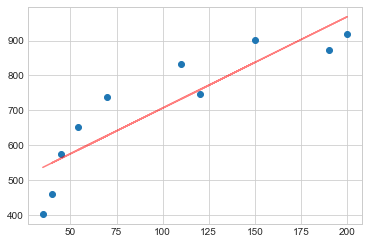

In [53]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

In [58]:
#коэффициент детерминации
z1 = b0 + b1 * salary
R1 = 1 - ((scoring - z1)**2).sum() / sum_of_squares(scoring)
R1

0.7876386635293686

In [60]:
# F-критерия Фишера
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [61]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [64]:
#критическая область от 5.3 до бесконечности
F = (R1 / k1) / ((1 - R1) / k2)
F
#статистика попала в критическую область -> уравнение регрессии признается значимым

29.67164085966451

In [66]:
#доверительный интервал
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [68]:
s_slope = standard_error_slope(salary, scoring, z1)
s_slope

0.48108279568516005

In [69]:
#уровень доверия 0.95 
alpha = 0.05
n = salary.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.306004135033371, 2.3060041350333704)

In [71]:
#доверительный интервал b1
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(1.5111599662593715, 3.729917798546158)

In [72]:
#доверительный интервал b0
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = standard_error_intercept(salary, scoring, z1)
s_intercept

56.46649755068153

In [73]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(313.9653804816363, 574.3893341670829)